Martin Iniguez de Onzono Muruaga

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from scipy import signal
import matplotlib.ticker as tck
import seaborn as sn

## 1. Visual Stimulus.

### a) Approximate the visual field and create the grid

In [2]:
def create_grid(x0,y0, incr_x,incr_y):
    x=np.arange(-x0,x0+incr_x,incr_x)
    y=np.arange(-y0,y0+incr_y,incr_y)
    return np.meshgrid(x,y)

def grating(K,theta,phi,A,grid):
    s = A * np.cos(K*grid[0,:,:]*np.cos(theta)+ K*grid[1,:,:]*np.sin(theta)-phi)
    return s

### b) Compute the sinusoidal grating and show it

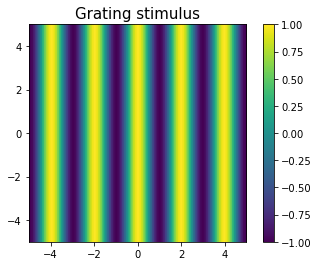

In [3]:
x0 = 5
y0 = 5

# Creating the neurons grid
grid = np.array(create_grid(x0,y0,0.1,0.1))

A= 1
theta= 0 
phi = 0
K= np.pi

# Creating the grating stimulus and plotting it inside our grid
s = grating(K,theta,phi,A,grid)

# Plotting the grating stimulus
plt.imshow(s,extent=[-x0,x0,-y0,y0]);
plt.colorbar();
plt.title('Grating stimulus',fontsize=15);

### c) Plot gratings with different  $ \theta$ 's and K's

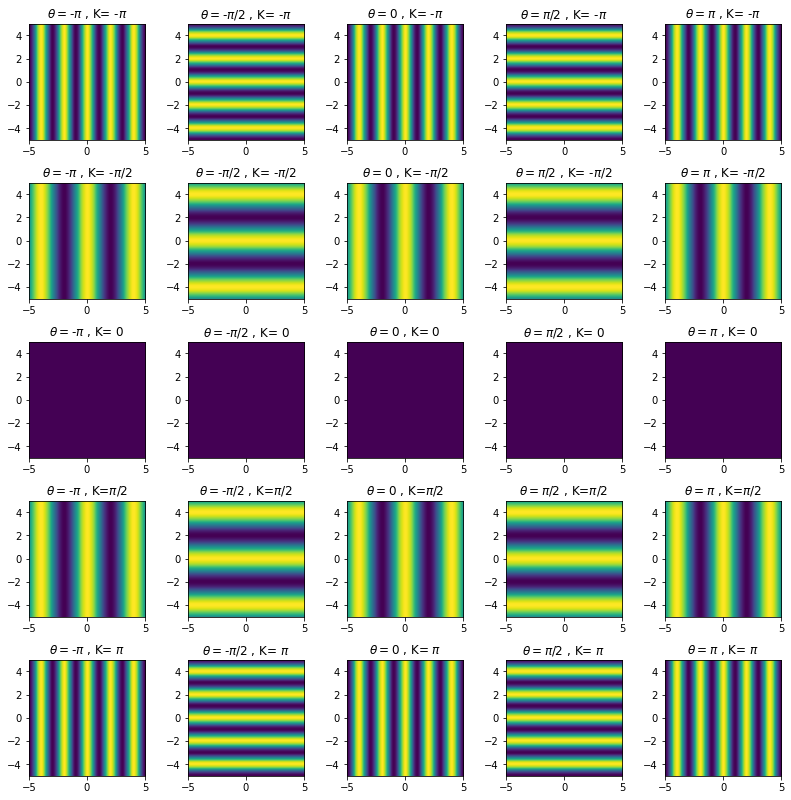

In [4]:
k_num=5
theta_num=5

diff_K = np.linspace(-np.pi,np.pi,k_num)
diff_theta = np.linspace (-np.pi,np.pi,theta_num)

theta_label = [r'$\theta= $-' + r'$\pi$', r'$\theta= $-' + r'$\pi$/2',r'$\theta= 0$',r'$\theta= $' + r'$\pi$/2',r'$\theta= $' + r'$\pi$']
K_label = ['K= -' + r'$\pi$', 'K= -' + r'$\pi$/2','K= 0','K=' + r'$\pi$/2','K= ' + r'$\pi$']

fig, ax = plt.subplots(figsize=(11, 11),nrows=theta_num, ncols=k_num, constrained_layout=True)

# Plotting gratings with different theta's and keys
for i in range(0,k_num):
    for j in range(0,theta_num):
        ax[i][j].imshow(grating(diff_K[i],diff_theta[j],phi,A,grid),extent=[-x0,x0,-y0,y0])
        ax[i][j].set_title(theta_label[j] + ' , ' + K_label[i])

We can see that the gratings for the negative values of K and $\theta$ are the same as the one as when using positive values. That can be explained due to the use of a cosine function to compute them, which is an even function. Also $\theta$ decides about the orientation of this patterned lines.

## 2. A model of receptive fields.

### a) Implement the Gabor function

In [5]:
def gabor_function(k,sigmax,sigmay,phi,grid):
    d= np.exp(-((grid[0,:,:]**2)/(2*(sigmax**2)))-((grid[1,:,:]**2)/(2*(sigmay**2))))*np.cos(k*grid[0,:,:]-phi)/(2*np.pi*sigmax*sigmay)
    return d

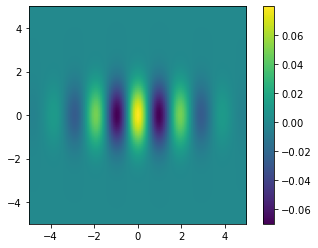

In [6]:
small_k=np.pi
sigma_x = 2
sigma_y = 1
phi_gab = 0

x0 = 5
y0 = 5

# Creating the neurons grid
grid = np.array(create_grid(x0,y0,0.1,0.1))

# Creating the gabor function and plotting it inside our grid
d = gabor_function(small_k,sigma_x,sigma_y,phi_gab,grid)
plt.imshow(d,extent=[-x0,x0,-y0,y0]);
plt.colorbar();

### b) Which is the optimal stimuli for this neuron. Where can you find these neurons? Does this RF characterize a simple cell or a complex cell and why?

The optimal stimuli for this neuron is a pattern of vertical lines.

Such neurons can be found in the V1 layers 2, 3 and 5.

It is a complex cell since it does not hold selectivity for phase $\Phi$ as we can see in the below figures. Also, in 1c, we can see that for an homogeneous stimulus, the linear response of the cell is (almost) zero, property of complex cells

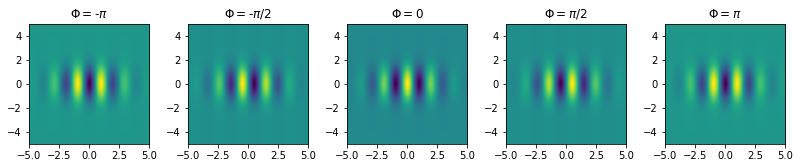

In [7]:
phi_num=5

diff_phi = np.linspace (-np.pi,np.pi,phi_num)

phi_label = [r'$\Phi= $-' + r'$\pi$', r'$\Phi= $-' + r'$\pi$/2',r'$\Phi= 0$',r'$\Phi= $' + r'$\pi$/2',r'$\Phi= $' + r'$\pi$']

fig, ax = plt.subplots(figsize=(11, 10),nrows=1, ncols=phi_num, constrained_layout=True)

# Plotting gratings with different phi's so we can see that it the function does not depend on this phase
for i in range(0,phi_num):
    ax[i].imshow(gabor_function(small_k,sigma_x,sigma_y,diff_phi[i],grid),extent=[-x0,x0,-y0,y0])
    ax[i].set_title(phi_label[i])

### c) Linear responses of cells

In [8]:
def linear_resp(s,Ds,incr_x,incr_y):
    rs= np.sum(s*d*incr_x*incr_y)
    return rs

The linear response corresponding to the grating was 0.49, while the one corresponding to a homogeneous stimulus was 0.0012, which is almost inexistent (property of complex cells).


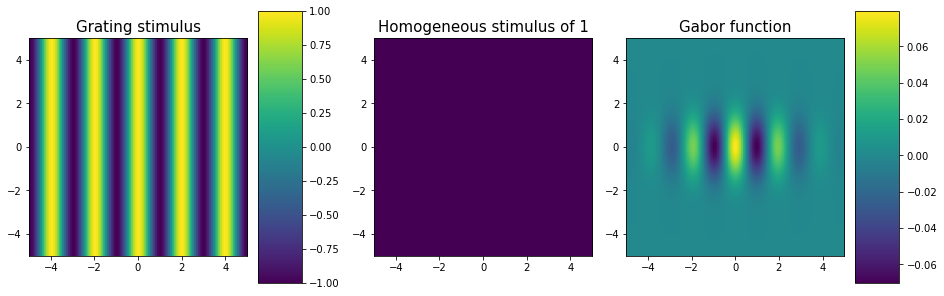

In [9]:
rs=round(linear_resp(s,d,0.1,0.1),2)

# Creating a visual stimulus only with homogeneous A 
s1 = s/s*A
rs1=linear_resp(s1,d,0.1,0.1)

print('The linear response corresponding to the grating was ' + str(round(rs,3)) +', while the one corresponding to a homogeneous stimulus was ' + str(round(rs1,4))+', which is almost inexistent (property of complex cells).')

fig, ax = plt.subplots(figsize=(13, 4),nrows=1, ncols=3, constrained_layout=True)

img1=ax[0].imshow(s,extent=[-x0,x0,-y0,y0]);
fig.colorbar(img1,ax=ax[0])
ax[0].set_title('Grating stimulus',fontsize=15);

img2=ax[1].imshow(s1,extent=[-x0,x0,-y0,y0]);
ax[1].set_title('Homogeneous stimulus of 1',fontsize=15);

img3=ax[2].imshow(d,extent=[-x0,x0,-y0,y0]);
fig.colorbar(img3,ax=ax[2]);
ax[2].set_title('Gabor function',fontsize=15);

As we can see in the grating stimulus, it is a periodic pattern of vertical lines (sinuosoidal), while the homogeneous stimulus is equal to 1 in all points of the grid. As it can be seen in the Gabor function, it holds a predilection for stimulus in the shape of vertical lines. It has a high-output region in the center part, while there are two vertical lobes contiguous to this high-ouput region per high output (following a Gaussian function though). It holds a OFF-ON-OFF-ON-OFF pattern. 

The grating stimulus also takes this OFF-ON-OFF pattern, so the inhibitory lobes (OFF) are not shown a big stimulus that would subtract to the linear response. However, the homogeneous stimulus will present the same value for the center part (ON) that for the OFF lobes, which are going to create an inhibitory effect. That makes the homogeneous stimulus to yield a 0 response, as it is a characteristic for complex cells.

## 3) Tuninig curve

The preferred K/k ratio is ± -1.0.


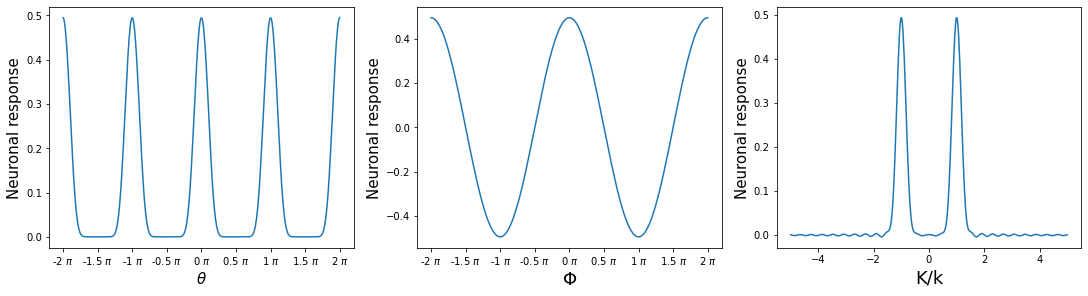

In [10]:
A= 1
theta= 0 
phi = 0
K= np.pi

variations_num=500

# Initializing the different variables

theta_change = np.linspace (-2*np.pi,2*np.pi,variations_num)
phi_change = np.linspace(-2*np.pi,2*np.pi,variations_num)
K_change = np.linspace(-5,5,variations_num)*np.pi

r_theta = np.zeros(variations_num)
r_K = np.zeros(variations_num)
r_phi = np.zeros(variations_num)

for i in range(0,variations_num):
    s1= grating(K,theta_change[i],phi,A,grid)
    r_theta[i]=linear_resp(s1,d,0.1,0.1)
    s2= grating(K,theta,phi_change[i],A,grid)
    r_phi[i]= linear_resp(s2,d,0.1,0.1)
    s3= grating(K_change[i],theta,phi,A,grid)
    r_K[i] = linear_resp(s3,d,0.1,0.1)

# Plotting the resulting linear responses plots
    
fig, ax = plt.subplots(figsize=(15, 4),nrows=1, ncols=3, constrained_layout=True)

ax[0].plot(theta_change/np.pi,r_theta);
ax[0].set_xlabel(r'$\theta$',fontsize=15)
ax[0].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax[0].set_ylabel('Neuronal response',fontsize=15)

ax[1].plot(phi_change/np.pi,r_phi);
ax[1].set_xlabel(r'$\Phi$',fontsize=18)
ax[1].xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax[1].set_ylabel('Neuronal response',fontsize=15)

ax[2].plot(K_change/np.pi,r_K);
ax[2].set_xlabel('K/k',fontsize=18);
ax[2].set_ylabel('Neuronal response',fontsize=15)

print(u"The preferred K/k ratio is \u00B1 " + str(round(K_change[np.argmax(r_K)]/small_k))+'.');

### Characterize the receptive field.

We can see that for $\theta$, a maximum stimulus appears at every $i*\pi$, emerging from an almost 0-based baseline; while for $\Phi$, that maximum appears at $i*2\pi$. In the case of the K/k ratio, it presents a symmmetric function around the y axis, with a maximum linear response peak at $K/k = \pm 1 $.

The preferred stimulus would be one with a $K/k = \pm 1$ , $\theta = i*\pi$ and $\Phi = i*2\pi$, like the one presented in 1b, where $i= -\inf,...,-3,-2,-1,0,1,2,3,...,\inf$.

## 4) Image filtering

### a) Load an image and convert it to grayscale

In [11]:
def rgb2gray(img):
    return np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

# Turning our image into grayscale
im2 = mpimg.imread('im2.png')     
gray = rgb2gray(im2)

### b) Implement equation 5 and convolute the filter with the image

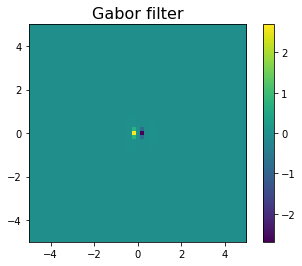

In [12]:
small_k=np.pi*8
sigma_x = 1/8
sigma_y = 1/8
phi_gab = np.pi/2

x0 = 5
y0 = 5

grid = np.array(create_grid(x0,y0,0.2,0.2))

# Creating the gabor function and plotting it inside our grid
d2 = gabor_function(small_k,sigma_x,sigma_y,phi_gab,grid)
plt.imshow(d2,extent=[-x0,x0,-y0,y0]);
plt.title('Gabor filter',fontsize=16);
plt.colorbar();

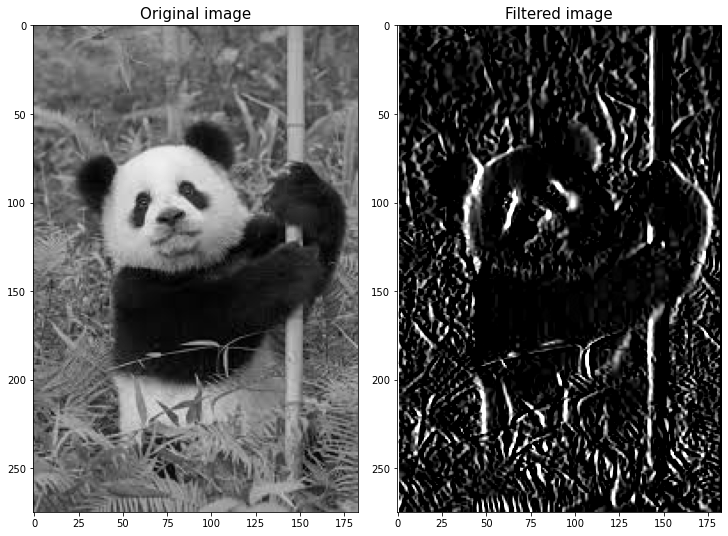

In [13]:
im=signal.fftconvolve(gray,d2,'same')

fig, ax = plt.subplots(figsize=(10, 10),nrows=1, ncols=2, constrained_layout=True)

ax[0].imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
ax[0].set_title('Original image',fontsize=15)

ax[1].imshow(im, cmap=plt.get_cmap('gray'), vmin=0, vmax=1);
ax[1].set_title('Filtered image',fontsize=15);

It can be seen that this filter is a vertical lines edge detector.